In [1]:
import pandas as pd
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup
from graphviz import Digraph
import re
import time
import numpy as np

In [2]:
an_urllib = urlopen("https://animalcrossing.fandom.com/wiki/Villager_list_(New_Horizons)")

In [3]:
an_request = requests.get("https://animalcrossing.fandom.com/wiki/Villager_list_(New_Horizons)")

In [4]:
# check the status code
print('The status code is', an_request.status_code)

The status code is 200


In [5]:
an = BeautifulSoup(an_request.text)

In [6]:
tables = an.find_all('table')

In [7]:
village_table = []
for row in tables[1].find_all("tr"):
    row_data = []
    
    for cell in row.find_all("td"):
        row_data.append(cell.text)
        
    if not row_data == []:
        village_table.append(row_data)

raw_data = pd.DataFrame(village_table)

In [8]:
raw_data

,0,1,2,3,4,5,6,7,8,9,...,2728,2729,2730,2731,2732,2733,2734,2735,2736,2737
0,\n\n\nName\n\nImage\n\nPersonality [1]\n\nSpec...,Admiral\n,\n,♂ Cranky\n,Bird\n,January 27th\n,"""aye aye""\n",Nature\n,Agent S\n,\n,...,June 7th\n,"""pronk""\n",Music\n,Zucker\n,\n,♂ Lazy\n,Octopus\n,March 8th\n,"""bloop""\n",Nature\n
1,Admiral\n,\n,♂ Cranky\n,Bird\n,January 27th\n,"""aye aye""\n",Nature\n,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Agent S\n,\n,♀ Peppy\n,Squirrel\n,July 2nd\n,"""sidekick""\n",Fitness\n,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Agnes\n,\n,♀ Sisterly\n,Pig\n,April 21st\n,"""snuffle""\n",Play\n,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Al\n,\n,♂ Lazy\n,Gorilla\n,October 18th\n,"""ayyeeee""\n",Fitness\n,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,Winnie\n,\n,♀ Peppy\n,Horse\n,January 31st\n,"""hay-OK""\n",Fashion\n,None,None,None,...,None,None,None,None,None,None,None,None,None,None
388,Wolfgang\n,\n,♂ Cranky\n,Wolf\n,November 25th\n,"""snarrrl""\n",Education\n,None,None,None,...,None,None,None,None,None,None,None,None,None,None
389,Yuka\n,\n,♀ Snooty\n,Koala\n,July 20th\n,"""tsk tsk""\n",Fashion\n,None,None,None,...,None,None,None,None,None,None,None,None,None,None
390,Zell\n,\n,♂ Smug\n,Deer\n,June 7th\n,"""pronk""\n",Music\n,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [9]:
# clean the dataframe a bit
# remove unneccessary columns
cleaned_data = raw_data.iloc[1:,0:7]
cleaned_data.columns = ["name", "image", "personality", "species", 
                        "birthday", "catchphrase", "hobbies"]
cleaned_data = cleaned_data.drop("image", axis = 1)

In [10]:
# make the data clean a bit

In [11]:
cleaned_data = cleaned_data.replace("\n", "", regex = True)
cleaned_data = cleaned_data.replace("♂", "", regex = True)
cleaned_data = cleaned_data.replace("♀", "", regex = True)
cleaned_data = cleaned_data.replace(" ", "", regex = True)

In [12]:
# add gender column
cleaned_data['gender'] = np.where((cleaned_data['personality'] == 'Cranky')|\
                                  (cleaned_data['personality'] == 'Jock')|\
                                  (cleaned_data['personality'] == 'Lazy')|\
                                  (cleaned_data['personality'] == 'Smug'), 'male', 'female' )

In [13]:
cleaned_data

,name,personality,species,birthday,catchphrase,hobbies,gender
1,Admiral,Cranky,Bird,January27th,"""ayeaye""",Nature,male
2,AgentS,Peppy,Squirrel,July2nd,"""sidekick""",Fitness,female
3,Agnes,Sisterly,Pig,April21st,"""snuffle""",Play,female
4,Al,Lazy,Gorilla,October18th,"""ayyeeee""",Fitness,male
5,Alfonso,Lazy,Alligator,June9th,"""it'same""",Play,male
...,...,...,...,...,...,...,...
387,Winnie,Peppy,Horse,January31st,"""hay-OK""",Fashion,female
388,Wolfgang,Cranky,Wolf,November25th,"""snarrrl""",Education,male
389,Yuka,Snooty,Koala,July20th,"""tsktsk""",Fashion,female
390,Zell,Smug,Deer,June7th,"""pronk""",Music,male


In [14]:
import altair as alt
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

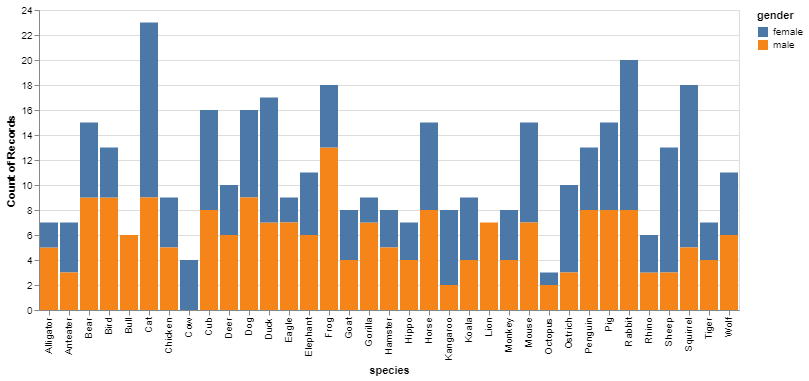

In [15]:
# find out the number of villages from each species
alt.Chart(cleaned_data).mark_bar().encode(
    alt.X('species'),
    y = 'count()',
    color = 'gender'
)

#### As we can see, there is more villagers that's Cat, Rabbit and Squirrel. It's rare to get a villager like Octopus or Cow.

- Anteater, Cat, Duck, Kanteroo, Koala, Mouse, Ostrich, Rabbit, Sheep, Squirrel has more female than male villagers.

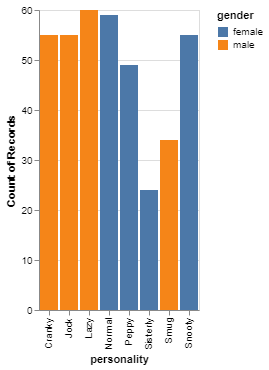

In [16]:
# find out the number of villages in different personailty
alt.Chart(cleaned_data).mark_bar().encode(
    alt.X('personality'),
    y = 'count()',
    color = 'gender'
)

#### There is more villagers with Normal and Lazy personality while it's relatively rare to see villagers with sistery and smug personality.

- Lazy is the most common personality among male villager while Normal is the most common personality among female.

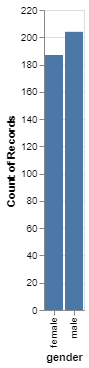

In [17]:
# number of male and female villagers
alt.Chart(cleaned_data).mark_bar().encode(
    alt.X('gender'),
    y = 'count()'
)

### As we can see, there are more male villagers than female villagers.

## Let's look at their hobbies!

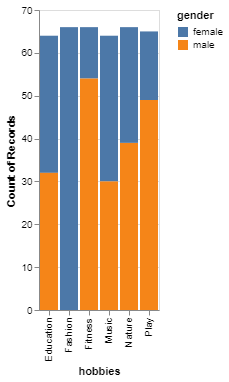

In [18]:
alt.Chart(cleaned_data).mark_bar().encode(
    alt.X('hobbies'),
    y = 'count()',
    color = 'gender'
)

### Hmm... It seens like no male villagers is interested in **Fashion**. The gender ration seems to be well balanced among Education and Music hobbies. There are more male villages interested into Natural and Play.

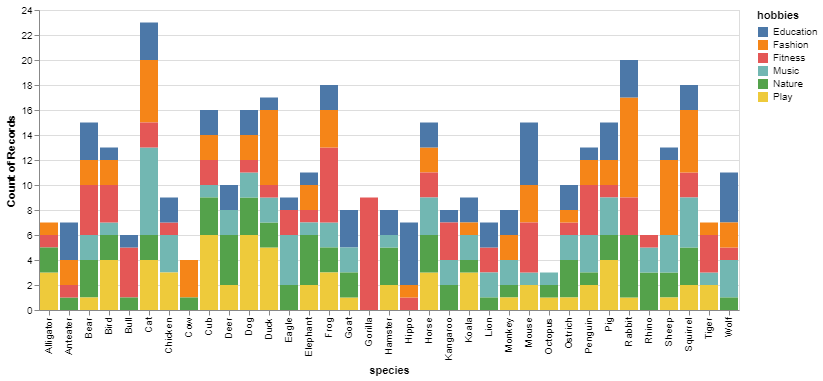

In [19]:
alt.Chart(cleaned_data).mark_bar().encode(
    alt.X('species'),
    y = 'count()',
    color = 'hobbies'
)

### It seems like hobbies are pretty balanced among all species... Wait! Why there is no on interested in education among Alligator, Cow, Gorrilla, Octopus and Rhino? I can understand that there were only 4 cows and 3 Octopus so it's hard to fill in all the categories. 
### Apparently the only thing Gorilla cares is Fitness!